## About Dataset

**Context**

In 2006, global concern was raised over the rapid decline in the honeybee population, an integral component to American honey agriculture. Large numbers of hives were lost to Colony Collapse Disorder, a phenomenon of disappearing worker bees causing the remaining hive colony to collapse. Speculation to the cause of this disorder points to hive diseases and pesticides harming the pollinators, though no overall consensus has been reached. Twelve years later, some industries are observing recovery but the American honey industry is still largely struggling. The U.S. used to locally produce over half the honey it consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey consumed every year originating from imports. This dataset provides insight into honey production supply and demand in America by state from 1998 to 2012.

**Content**

The National Agricultural Statistics Service (NASS) is the primary data reporting body for the US Department of Agriculture (USDA). NASS's mission is to "provide timely, accurate, and useful statistics in service to U.S. agriculture". From datasets to census surveys, their data covers virtually all aspects of U.S. agriculture. Honey production is one of the datasets offered. Click here for the original page containing the data along with related datasets such as Honey Bee Colonies and Cost of Pollination. Data wrangling was performed in order to clean the dataset. honeyproduction.csv is the final tidy dataset suitable for analysis. The three other datasets (which include "honeyraw" in the title) are the original raw data downloaded from the site. They are uploaded to this page along with the "Wrangling The Honey Production Dataset" kernel as an example to show users how data can be wrangled into a cleaner format. Useful metadata on certain variables of the honeyproduction dataset is provided below:

* numcol: Number of honey producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies which did not survive the entire year
* yieldpercol: Honey yield per colony. Unit is pounds
* totalprod: Total production (numcol x yieldpercol). Unit is pounds
* stocks: Refers to stocks held by producers. Unit is pounds
* priceperlb: Refers to average price per pound based on expanded sales. Unit is dollars.
* prodvalue: Value of production (totalprod x priceperlb). Unit is dollars.
* Other useful information: Certain states are excluded every year (ex. CT) to avoid disclosing data for individual operations. Due to rounding, total colonies multiplied by total yield may not equal production. Also, summation of states will not equal U.S. level value of production.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

df = pd.read_csv("honeyproduction.csv")
print(df.head())

  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  


Group the data by the mean of total production by year, and create scatterplot to see relationship between these two variables.

In [3]:
prod_per_year = df.groupby('year').totalprod.mean().reset_index()

X = prod_per_year['year']
X = X.values.reshape(-1,1)
print(X)

[[1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]]


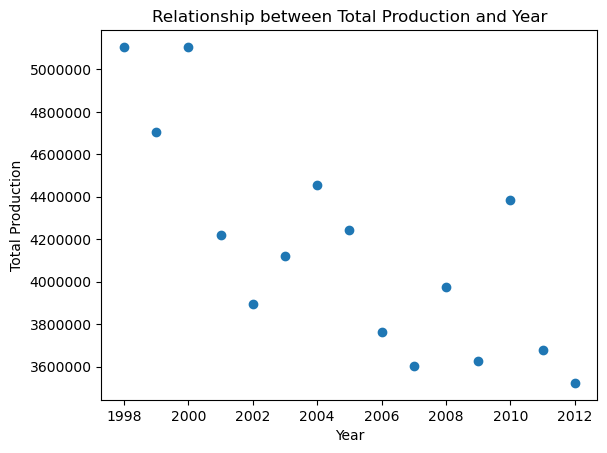

In [4]:
y = prod_per_year['totalprod']

plt.scatter(X, y)
plt.title('Relationship between Total Production and Year')
plt.ticklabel_format(style='plain',useOffset=None)
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.show()

Create Linear Regression using scikit-learn to fit into data.

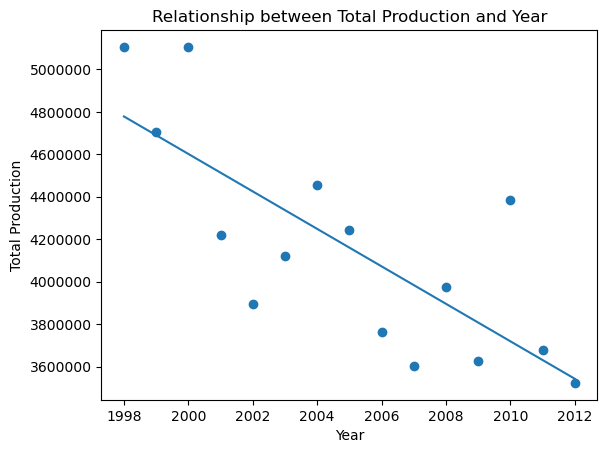

In [5]:
regr = linear_model.LinearRegression()
regr.fit(X, y)
y_predict = regr.predict(X)

plt.scatter(X, y)
plt.plot(X, y_predict)
plt.title('Relationship between Total Production and Year')
plt.ticklabel_format(style='plain', useOffset=None)
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.show()

Prediction of Total Production in the Year 2050.

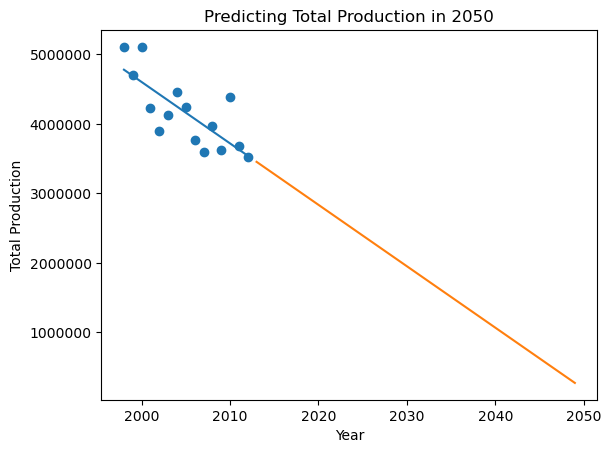

In [6]:
num = np.array(range(2013, 2050))
X_future = num.reshape(-1,1)
future_predict = regr.predict(X_future)

plt.scatter(X, y)
plt.plot(X, y_predict)
plt.plot(X_future, future_predict)
plt.title('Predicting Total Production in 2050')
plt.ticklabel_format(style='plain', useOffset=None)
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.show()